<h4><b>Dataset name / short description:</b></h4>

The planets dataset from Seaborn is a collection of data about planets beyond our Solar System, known as exoplanets. The dataset contains information on 1,039 exoplanets, including their discovery method, orbital period, mass, and distance from Earth.

Here are the columns in the planets dataset:

method: the method used to discover the planet, such as radial velocity, transit, or imaging.
number: the number of planets discovered using that method.
orbital_period: the time it takes for the planet to orbit its host star, in days.
mass: the mass of the planet relative to Jupiter.
distance: the distance from Earth to the planet's host star, in light-years.
year: the year the planet was discovered.

<h4><b>Data source (url):</b></h4>
Seaborn library

<h4><b>Data format:</b></h4>
Dataset in the Pandas DataFrame

<h4><b>Data description and limitations:</b></h4>
Not all discoverign methods are mentioned in the dataset. There could be other exoplanets which are not mentioned in the dataset becuase of a different discovery method. Another limitation that dataset is current as of 2014. Since the dataset has not been updated in nine years, it may not include more recent exoplanet discoveries.

<h4><b>The question related to the dataset:</b></h4>
Have there been any notable trends in exoplanet discovery over time?

<h4><b>Code:</b></h4>

In [50]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns

In [51]:
# I decided to make an analysis of seaborn datasets
# firstly, I need to get names of all datasets
# to choose the mosr interesting for me
sns.get_dataset_names()

# I googled that 
# "fmri" - contains information about brain activity measured using functional magnetic resonance imaging (fMRI).
# "planets" - contains information about planets discovered outside of our solar system.
# both of them are interesting for me
# I will take "planets" dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [52]:
# load the dataset
# firstly, we can see the the structure of the df
df = sns.load_dataset("planets")
df.info()

# there are 6 columns, that containt string, float and int formats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [53]:
# see the the columns and rows structure
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [54]:
# we can see that ther are a lof of Nan values in the column "mass"
# I wanted to delete them
# df = df.dropna()
# but if we delete, we lose 537 rows
# I decided to keep them

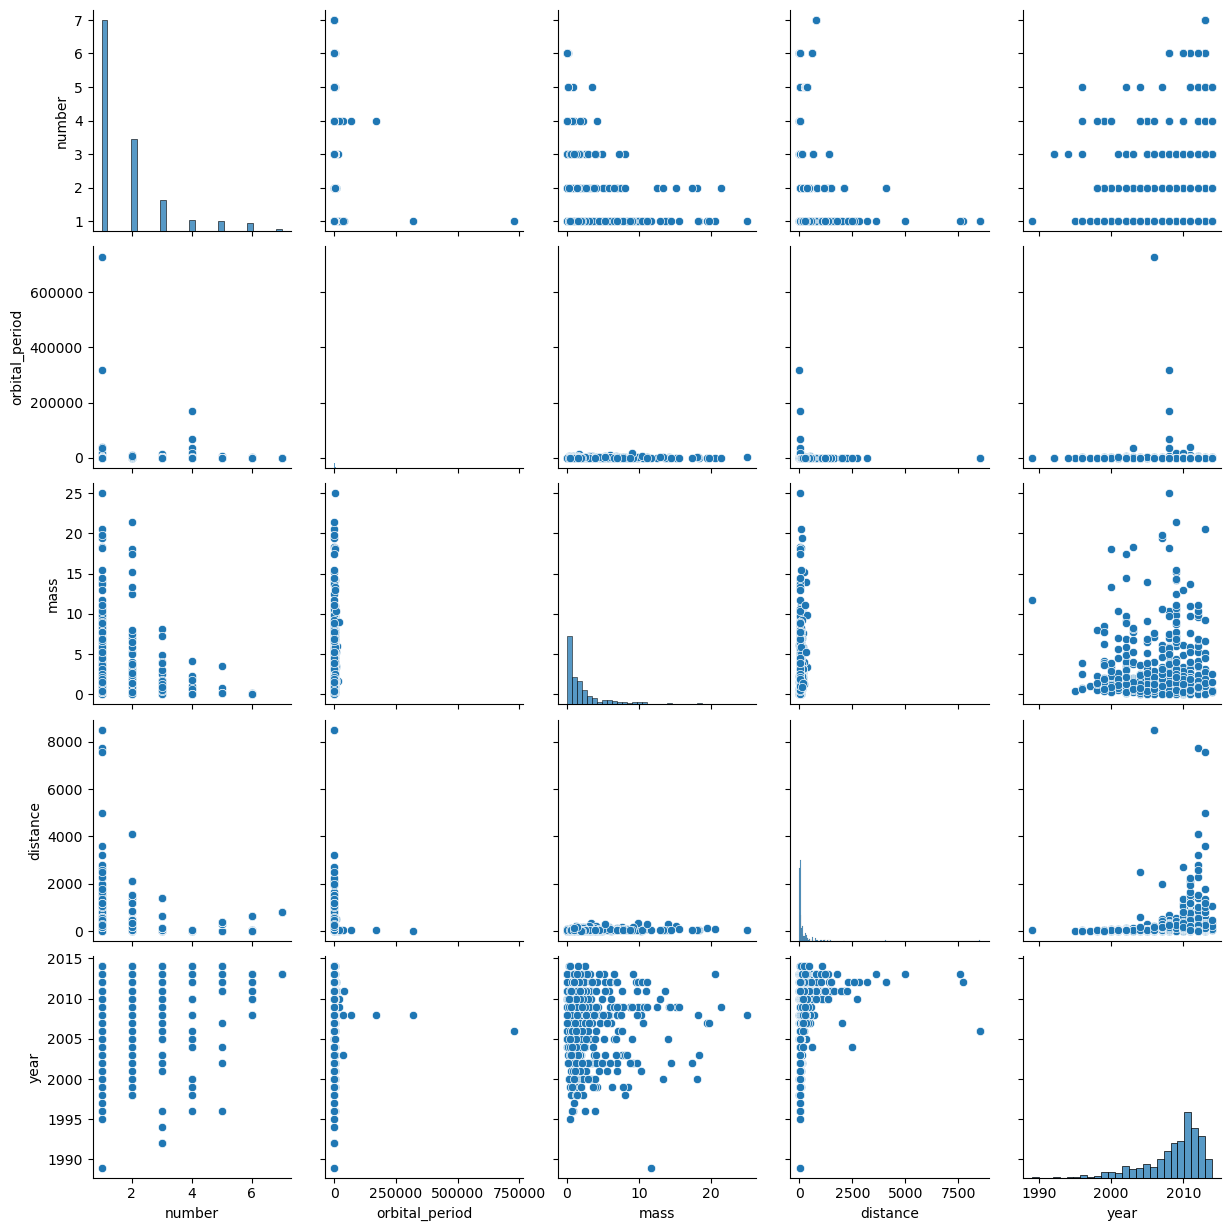

In [55]:
# we can start with playing around and see do we have any correlation
# joint plot
sns.pairplot(df)

# we do not see any correlation

In [56]:
# I decided to make also a table of correlations
# maybe it could help to find anything interesting
correlations = df.corr(numeric_only=True)
correlations

# we do not see any strong correlation

,number,orbital_period,mass,distance,year
number,1.000000,-0.012570,-0.241429,-0.033638,0.147849
orbital_period,-0.012570,1.000000,0.173725,-0.034365,-0.032333
mass,-0.241429,0.173725,1.000000,0.274082,-0.123787
distance,-0.033638,-0.034365,0.274082,1.000000,0.178922
year,0.147849,-0.032333,-0.123787,0.178922,1.000000


In [57]:
# we can see what was the most popular method to discover a planet
df["method"].value_counts()

# there are two as the most popular methods: Radial Velocity and Transit

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

<Axes: xlabel='year', ylabel='number'>

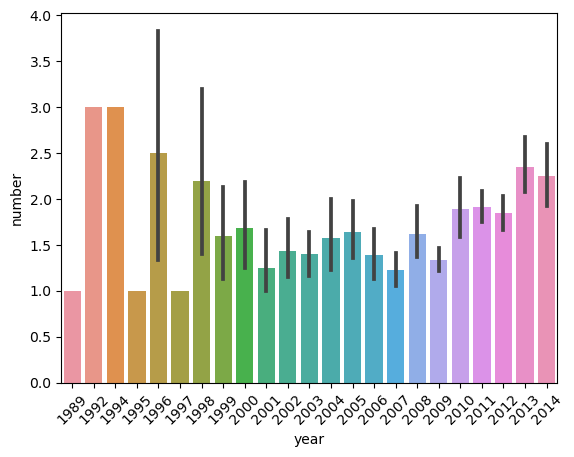

In [65]:
# bar plot
plt.xticks(rotation=45)
sns.barplot(x='year',y='number',data=df)

# here we can see that the number of dicovering exoplanets changed during years
# I did not understand what these black lines mean 
# and decided to make to use Pandas to check the years
# with the biggest amount of discovers

In [71]:

year = df[df['number'] > 6]
year

,method,number,orbital_period,mass,distance,year
818,Transit,7,7.008151,NaN,780.0,2013
819,Transit,7,8.719375,NaN,780.0,2013
820,Transit,7,59.736670,NaN,780.0,2013
821,Transit,7,91.939130,NaN,780.0,2013
822,Transit,7,124.914400,NaN,780.0,2013
823,Transit,7,210.606970,NaN,780.0,2013
824,Transit,7,331.600590,NaN,780.0,2013


In [61]:


# Group the number of exoplanets discovered by year
discoveries_by_year = df.groupby('year')['planet'].count()

# Create a line chart of exoplanet discoveries by year
plt.plot(discoveries_by_year.index, discoveries_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Exoplanets Discovered')
plt.title('Exoplanet Discoveries Over Time')
plt.show()


KeyError: 'Column not found: planet'